# Bag of Words

Bag of Words란 단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터의 수치화 표현 방법입니다. Bag of Words를 직역하면 단어들의 가방이라는 의미입니다. 단어들이 들어있는 가방을 상상해봅시다. 갖고있는 어떤 텍스트 문서에 있는 단어들을 가방에다가 전부 넣습니다. 그러고나서 이 가방을 흔들어 단어들을 섞습니다. 만약, 해당 문서 내에서 특정 단어가 N번 등장했다면, 이 가방에는 그 특정 단어가 N개 있게됩니다. 또한 가방을 흔들어서 단어를 섞었기 때문에 더 이상 단어의 순서는 중요하지 않습니다.

In [8]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 92kB 10.3MB/s 
     |████████████████████████████████| 460kB 45.6MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


## 직접 구현하기

In [9]:
from konlpy.tag import Okt
import re  
okt=Okt()  

token=re.sub("(\.)","","정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.")  
# 정규 표현식을 통해 온점을 제거하는 정제 작업입니다.  
token=okt.morphs(token)  
# OKT 형태소 분석기를 통해 토큰화 작업을 수행한 뒤에, token에다가 넣습니다.  

word2index={}  
bow=[]  
for voca in token:  
         if voca not in word2index.keys():  
             word2index[voca]=len(word2index)  
# token을 읽으면서, word2index에 없는 (not in) 단어는 새로 추가하고, 이미 있는 단어는 넘깁니다.   
             bow.insert(len(word2index)-1,1)
# BoW 전체에 전부 기본값 1을 넣어줍니다. 단어의 개수는 최소 1개 이상이기 때문입니다.  
         else:
            index=word2index.get(voca)
# 재등장하는 단어의 인덱스를 받아옵니다.
            bow[index]=bow[index]+1
# 재등장한 단어는 해당하는 인덱스의 위치에 1을 더해줍니다. (단어의 개수를 세는 것입니다.)  
print(word2index)  

{'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}


In [10]:
print(bow)

[1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


## CountVectorizer 사용하기

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[1 1 2 1 2 1]]
{'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


## TF-IDF 행렬 만들기

In [12]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

In [13]:
docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [14]:
N = len(docs) # 총 문서의 수

def tf(t, d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df + 1))

def tfidf(t, d):
    return tf(t,d)* idf(t)

In [15]:
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]        
        result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [16]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [18]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]

        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


## Tensorflow로 Bag of Words 구현하기

In [19]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [20]:
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

In [21]:
t = Tokenizer()
t.fit_on_texts(texts)
print(t.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


각 단어에 숫자 1부터 시작하는 정수 인덱스가 부여되었습니다. 이제 텍스트 데이터에 texts_to_matrix()를 사용해보겠습니다. texts_to_matrix()란 이름에서 알 수 있지만, 이 도구는 입력된 텍스트 데이터로부터 행렬(matrix)를 만드는 도구입니다. texts_to_matrx()는 총 4개의 모드를 지원하는데 각 모드는 'binary', 'count', 'freq', 'tfidf'로 총 4개입니다. 우선 'count' 모드를 사용해봅시다.

In [22]:
print(t.texts_to_matrix(texts, mode = 'count')) # texts_to_matrix의 입력으로 texts를 넣고, 모드는 'count'

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


위의 경우는 총 4개의 모드 중에서 'count' 모드를 사용했을 경우입니다. 'count'를 사용하면 우리가 앞서 배운 문서 단어 행렬(Document-Term Matrix, DTM)을 생성합니다. DTM에서의 인덱스는 앞서 확인한 word_index의 결과입니다.

다만 주의할 점은 각 단어에 부여되는 인덱스는 1부터 시작하는 반면에 완성되는 행렬의 인덱스는 0부터 시작합니다. 실제로 단어의 개수는 9개였지만 완성된 행렬의 열의 개수는 10개인 것과 첫번째 열은 모든 행에서 값이 0인 것을 볼 수 있습니다. 인덱스 0에는 그 어떤 단어도 할당되지 않았기 때문입니다.

우선, 네번째 행을 보겠습니다. 네번째 행은 테스트 데이터에서 네번째 문장을 의미합니다. 네번째 행은 8번째 열, 9번째 열, 10번째 열에서 1의 값을 가집니다. 이는 7번 단어, 8번 단어, 9번 단어가 네번째 문장에서 1개씩 존재함을 의미합니다. 위에서 정수 인코딩 된 결과를 보면 7번 단어는 '저는', 8번 단어는 '과일이', 9번 단어는 '좋아요'입니다. 세번째 행의 첫번째 열의 값은 2인데, 이는 세번째 문장에서 1번 인덱스를 가진 바나나가 두 번 등장했기 때문입니다.

앞서 배웠듯이 DTM은 bag of words를 기반으로 하므로 단어 순서 정보는 보존되지 않습니다. 사실 더 구체적으로는 4개의 모든 모드에서 단어 순서 정보는 보존되지 않습니다. 이제 'binary' 모드를 보겠습니다.

In [5]:
print(t.texts_to_matrix(texts, mode = 'binary'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


DTM과 결과가 매우 유사해보입니다. 다만 세번째 행, 두번째 열의 값이 DTM에서는 2였는데 여기서는 1로 바뀌었습니다. 그 이유는 'binary' 모드는 해당 단어가 존재하는지만 관심을 가지고 해당 단어가 몇 개였는지는 무시하기 때문입니다. 해당 단어가 존재하면 1, 단어가 존재하지 않으면 0의 값을 가집니다. 즉, 단어의 존재 유무로만 행렬을 표현합니다. 이제 'tfidf' 모드를 보겠습니다.

In [6]:
print(t.texts_to_matrix(texts, mode = 'tfidf').round(2)) # 둘째 자리까지 반올림하여 출력

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


'tfidf' 모드는 말 그대로 TF-IDF 행렬을 만듭니다. 다만, TF-IDF 챕터에서 배운 기본식이나 사이킷런의 TfidfVectorizer에서 사용하는 식이랑 또 조금 다릅니다. 앞서 배운 기본식에서 TF는 각 문서에서의 각 단어의 빈도였다면 'tfidf' 모드에서는 TF를 각 문서에서의 각 단어의 빈도에 자연 로그를 씌우고 1을 더한 값으로 정의했습니다. idf에서는 앞서 배운 기본식에서 로그는 자연 로그를 사용하고, 로그 안의 분수에 1을 추가로 더했습니다. 물론, 이러한 식을 굳이 기억할 필요는 없고 여전히 TF-IDF의 기존 의도를 갖고 있다고 이해하면 됩니다.

In [7]:
print(t.texts_to_matrix(texts, mode = 'freq').round(2)) # 둘째 자리까지 반올림하여 출력

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


마지막으로 'freq' 모드입니다. 'freq' 모드는 각 문서에서의 각 단어의 등장 횟수를 분자로, 각 문서의 크기(각 문서에서 등장한 모든 단어의 개수의 총 합)를 분모로 하는 표현 방법입니다. 예를 들어 세번째 행을 보겠습니다. 세번째 문장은 '길고 노란 바나나 바나나' 였습니다. 문서의 크기는 4인데, 바나나는 총 2회 등장했습니다. 이에 따라서 세번째 문장에서의 단어 '바나나'의 값은 위의 행렬에서 0.5가 됩니다. 반면에 '길고', '노란'이라는 두 단어는 각 1회 등장했으므로 각자 1/4의 값인 0.25의 값을 가집니다.

# 텐서플로우 기초

## import 할 때 패키지 네이밍

In [ ]:
from tensorflow.keras.layers     import Dense
from tensorflow.keras.models     import Sequential
from tensorflow.keras.callbacks  import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

## 딥러닝 실행 순서

1. 전처리: 학습에 필요한 데이터 전처리를 수행합니다.  
2. 모델링(model): 모델을 정의합니다.  
3. 컴파일(compile): 모델을 생성합니다.  
4. 학습 (fit): 모델을 학습시킵니다.

아래는 실제 전처리 - 모델링 - 컴파일 - 학습으로 이어지는 코드를 보여줍니다.

In [ ]:
import tensorflow as tf

tf.keras.layers.Dense(10)

In [ ]:
from tensorflow.keras.layers import Dense

Dense(10)

In [ ]:
# 필요한 패키지 import
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# 데이터 전처리
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([5.0, 6.0, 7.0, 8.0, 9.0, 10.0], dtype=float)

# 모델의 정의 (modeling)
model = Sequential([
    Dense(1),
])

# 모델의 생성 (compile)
model.compile(optimizer='sgd', loss='mse')

# 학습 (fit)
model.fit(xs, ys, epochs=1200, verbose=0)

# 검증
# 16.000046
model.predict([10.0])

array([[16.000046]], dtype=float32)

## 기본 모델 구현 이해하기

tensorflow 2.0은 keras의 Sequential 방식과 동일하게 블록쌓기 방식으로 매우 쉽게 모델링을 할 수 있습니다.  

Dense Layer는 가장 기본적인 신경망 층이라고 이해하시면 됩니다.  

Dense == Fully Connected Layer 라고도 불리웁니다.

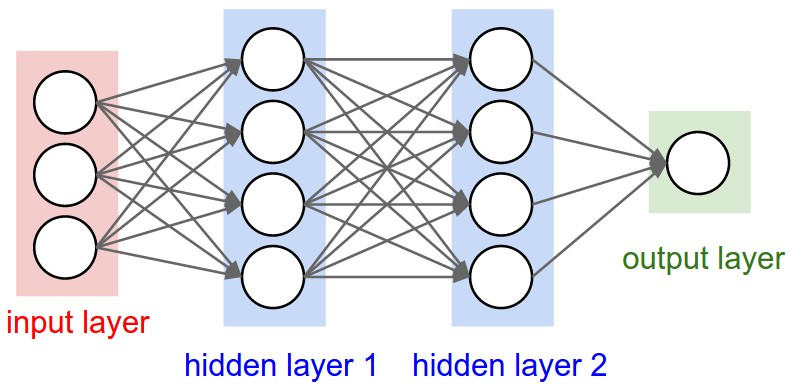

In [ ]:
from IPython.display import Image

Image('https://cs231n.github.io/assets/nn1/neural_net2.jpeg')

In [ ]:
model = Sequential([
    Dense(1),
])

## 적절한 optimizer와 loss 선정하기

우리는 적절한 회귀 값을 예측하는 모델을 만들어야 합니다.  

regression(회귀) 예측을 위해서는 loss=mse를 선택합니다.  

optimizer는 여러가지를 활용할 수는 있지만, 단순 회귀에는 sgd가 적당합니다.

## compile

선정한 optimizer와 loss를 지정해주고 compile 합니다.

In [ ]:
model.compile(optimizer='sgd', loss='mse')

## fit

이제, 모델에 학습을 진행해야합니다. fit() 메소드를 활용하여 학습을 진행합니다.  

학습시, feature, label 값 지정 그리고 epochs을 지정합니다.

In [ ]:
model.fit(xs, ys, epochs=1200, verbose=0)

## Predict로 잘 학습이 되어있는지 검증합니다.

In [ ]:
# output
# 16.000046
model.predict([10.0])

array([[16.000046]], dtype=float32)

# 선형 회귀 구현하기

In [ ]:
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트
import numpy as np # Numpy를 임포트

In [ ]:
X=np.array([1,2,3,4,5,6,7,8,9]) # 공부하는 시간
y=np.array([11,22,33,44,53,66,77,87,95]) # 각 공부하는 시간에 맵핑되는 성적

In [ ]:
model=Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
sgd=optimizers.SGD(lr=0.01)
# 학습률(learning rate, lr)은 0.01로 합니다.
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
# sgd는 경사 하강법을 의미.
# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.fit(X,y, batch_size=1, epochs=300, shuffle=False)
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.

Epoch 1/300
9/9 [==============================] - 0s 2ms/step - loss: 315.1164 - mse: 315.1164
Epoch 2/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1668 - mse: 2.1668
Epoch 3/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1661 - mse: 2.1661
Epoch 4/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1655 - mse: 2.1655
Epoch 5/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1648 - mse: 2.1648
Epoch 6/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1642 - mse: 2.1642
Epoch 7/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1636 - mse: 2.1636
Epoch 8/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1630 - mse: 2.1630
Epoch 9/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1624 - mse: 2.1624
Epoch 10/300
9/9 [==============================] - 0s 24ms/step - loss: 2.1619 - mse: 2.1619
Epoch 11/300
9/9 [==============================] - 0s 2ms/step - loss: 2.

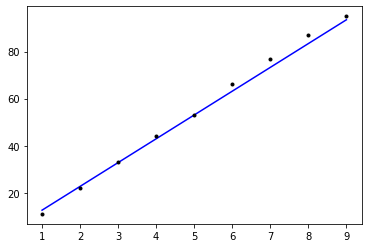

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

In [ ]:
print(model.predict([9.5]))

[[98.556465]]


# 로지스틱 회귀 구현하기

In [23]:
%matplotlib inline
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립 사용

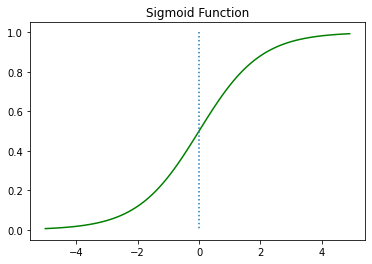

In [24]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

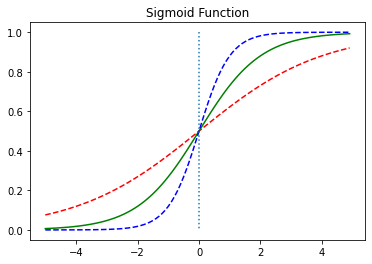

In [25]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

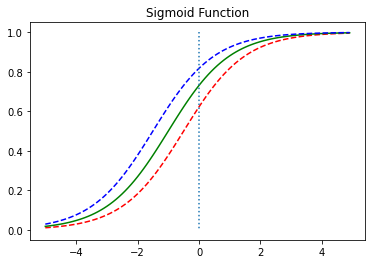

In [26]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

In [27]:
import numpy as np
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

In [28]:
X = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) #숫자 10부터 1

In [29]:
model=Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))
sgd=optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd ,loss='binary_crossentropy',metrics=['binary_accuracy'])
# 옵티마이저는 경사하강법 sgd를 사용합니다.
# 손실 함수(Loss function)는 binary_crossentropy(이진 크로스 엔트로피)를 사용합니다.
model.fit(X,y, batch_size=1, epochs=200, shuffle=False)
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 200번 시도합니다.

Epoch 1/200
13/13 [==============================] - 2s 2ms/step - loss: 6.6793 - binary_accuracy: 0.5587  
Epoch 2/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1399 - binary_accuracy: 0.9526
Epoch 3/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1385 - binary_accuracy: 0.9526
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1374 - binary_accuracy: 0.9526
Epoch 5/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1363 - binary_accuracy: 0.9526
Epoch 6/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1353 - binary_accuracy: 0.9526
Epoch 7/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1343 - binary_accuracy: 0.9526
Epoch 8/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1332 - binary_accuracy: 0.9526
Epoch 9/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1322 - binary_accuracy: 0.9526
Epoch 10/200
13/13 [========================

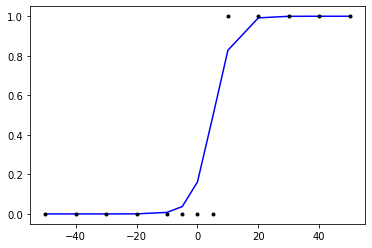

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

In [31]:
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

[[0.21022335]
 [0.26857203]
 [0.3362212 ]
 [0.41132757]
 [0.4507527 ]]
[[0.8691449 ]
 [0.99400264]
 [0.9997583 ]
 [0.99999034]
 [1.        ]]


# 다중 선형 회귀 구현하기

중간 고사, 기말 고사, 그리고 추가 점수를 어떤 공식을 통해 최종 점수를 계산한 데이터가 있고, 그 규칙을 찾고싶다면 이제는 더 이상 독립 변수가 1개가 아닙니다.

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

In [ ]:
X=np.array([[70,85,11],[71,89,18],[50,80,20],[99,20,10],[50,10,10]]) # 중간, 기말, 가산점
# 입력 벡터의 차원은 3입니다. 즉, input_dim은 3입니다.
y=np.array([73,82,72,57,34]) # 최종 성적
# 출력 벡터의 차원은 1입니다. 즉, output_dim은 1입니다.

In [ ]:

'''
model=Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))
sgd=optimizers.SGD(lr=0.00001)
# 학습률(learning rate, lr)은 0.00001로 합니다.
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
# sgd는 경사 하강법을 의미.
# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.fit(X,y, batch_size=1, epochs=2000, shuffle=False)
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 2,000번 시도합니다.
'''

"\nmodel=Sequential()\nmodel.add(Dense(1, input_dim=3, activation='linear'))\nsgd=optimizers.SGD(lr=0.00001)\n# 학습률(learning rate, lr)은 0.00001로 합니다.\nmodel.compile(optimizer=sgd ,loss='mse',metrics=['mse'])\n# sgd는 경사 하강법을 의미.\n# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.\nmodel.fit(X,y, batch_size=1, epochs=2000, shuffle=False)\n# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 2,000번 시도합니다.\n"

# 다중 로지스틱 회귀 구현하기

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

In [ ]:
X=np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# 입력 벡터의 차원은 2입니다. 즉, input_dim은 2입니다.
y=np.array([0, 1, 1, 1])
# 출력 벡터의 차원은 1입니다. 즉, output_dim은 1입니다.

In [ ]:
'''
model=Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid')) # 이제 입력의 차원은 2입니다.
model.compile(optimizer='sgd' ,loss='binary_crossentropy',metrics=['binary_accuracy'])
# sgd는 경사 하강법을 의미.
# 손실 함수(Loss function)는 binary_crossentropy(이진 크로스 엔트로피)를 사용합니다.
model.fit(X,y, batch_size=1, epochs=800, shuffle=False)
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 800번 시도합니다.
'''

"\nmodel=Sequential()\nmodel.add(Dense(1, input_dim=2, activation='sigmoid')) # 이제 입력의 차원은 2입니다.\nmodel.compile(optimizer='sgd' ,loss='binary_crossentropy',metrics=['binary_accuracy'])\n# sgd는 경사 하강법을 의미.\n# 손실 함수(Loss function)는 binary_crossentropy(이진 크로스 엔트로피)를 사용합니다.\nmodel.fit(X,y, batch_size=1, epochs=800, shuffle=False)\n# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 800번 시도합니다.\n"

# 소프트맥스 회귀 구현하기

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense, Flatten # 케라스의 Dense(), Flatten()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(128, activation='relu'),
  Dropout(0.2),
  Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3019 - accuracy: 0.9121
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1466 - accuracy: 0.9571
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1089 - accuracy: 0.9666
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0890 - accuracy: 0.9722
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0751 - accuracy: 0.9768
313/313 - 1s - loss: 0.0780 - accuracy: 0.9758


[0.07796133309602737, 0.9757999777793884]

# 다층 퍼셉트론으로 20개의 뉴스 분류하기

In [32]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

사이킷런에서는 20개의 다른 주제를 가진 18,846개의 뉴스 그룹 이메일 데이터를 제공합니다.

In [33]:
newsdata = fetch_20newsgroups(subset = 'train') # 'train'을 기재하면 훈련 데이터만 리턴한다.

위의 subset의 값으로 'all'을 넣으면 전체 데이터인 18,846개의 샘플을 다운로드할 수 있으며, 'train'을 넣으면 훈련 데이터를, 'test'를 넣으면 테스트 데이터를 다운로드할 수 있습니다. newsdata.keys()를 출력하면 해당 데이터의 속성을 확인할 수 있습니다.

In [34]:
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


해당 데이터는 data, filenames, target_names, target, DESCR, description이라는 6개 속성을 갖고 있습니다. 이 중 실제로 훈련에 사용할 속성은 이메일 본문인 data와 메일이 어떤 주제인지 기재된 숫자 레이블인 target입니다. 우선 훈련용 샘플의 개수를 보겠습니다.

In [35]:
print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))


훈련용 샘플의 개수 : 11314


훈련 샘플은 11,314개가 존재합니다. target_names에는 20개의 주제의 이름을 담고있습니다. 어떤 주제가 있는지 확인해보겠습니다.

In [36]:
print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


이번 챕터 실습의 목적은 테스트 데이터에서 이메일 본문을 보고 20개의 주제 중 어떤 주제인지를 맞추는 것입니다. 레이블인 target에는 총 0부터 19까지의 숫자가 들어가있는데 첫번째 샘플의 경우에는 몇 번 주제인지 확인해보겠습니다.

In [37]:
print('첫번째 샘플의 레이블 : {}'.format(newsdata.target[0]))

첫번째 샘플의 레이블 : 7


In [38]:
print('7번 레이블이 의미하는 주제 : {}'.format(newsdata.target_names[7]))


7번 레이블이 의미하는 주제 : rec.autos


In [39]:
print(newsdata.data[0]) # 첫번째 샘플 출력

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [40]:
data = pd.DataFrame(newsdata.data, columns = ['email']) # data로부터 데이터프레임 생성
data['target'] = pd.Series(newsdata.target) # target 열 추가
data[:5] # 상위 5개 행을 출력

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


In [42]:
data.isnull().values.any()

False

In [43]:
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


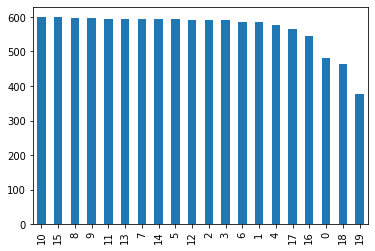

In [44]:
data['target'].value_counts().plot(kind='bar');

In [45]:
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [46]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True) # 'test'를 기재하면 테스트 데이터만 리턴한다.
train_email = data['email'] # 훈련 데이터의 본문 저장
train_label = data['target'] # 훈련 데이터의 레이블 저장
test_email = newsdata_test.data # 테스트 데이터의 본문 저장
test_label = newsdata_test.target # 테스트 데이터의 레이블 저장

In [47]:
max_words = 10000 # 실습에 사용할 단어의 최대 개수
num_classes = 20 # 레이블의 수

In [48]:
def prepare_data(train_data, test_data, mode): # 전처리 함수
    t = Tokenizer(num_words = max_words) # max_words 개수만큼의 단어만 사용한다.
    t.fit_on_texts(train_data)
    X_train = t.texts_to_matrix(train_data, mode=mode) # 샘플 수 × max_words 크기의 행렬 생성
    X_test = t.texts_to_matrix(test_data, mode=mode) # 샘플 수 × max_words 크기의 행렬 생성
    return X_train, X_test, t.index_word

In [49]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary') # binary 모드로 변환
y_train = to_categorical(train_label, num_classes) # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes) # 원-핫 인코딩

In [50]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [51]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [53]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(max_words,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

In [54]:
modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장.

for mode in modes: # 4개의 모드에 대해서 각각 아래의 작업을 반복한다.
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) # 모델을 훈련하고 평가.
    print(mode+' 모드의 테스트 정확도:', score)

Epoch 1/5
80/80 [==============================] - 1s 11ms/step - loss: 2.7121 - accuracy: 0.1872 - val_loss: 0.9936 - val_accuracy: 0.8419
Epoch 2/5
80/80 [==============================] - 0s 5ms/step - loss: 1.0346 - accuracy: 0.7224 - val_loss: 0.4741 - val_accuracy: 0.8869
Epoch 3/5
80/80 [==============================] - 0s 5ms/step - loss: 0.4698 - accuracy: 0.8818 - val_loss: 0.3476 - val_accuracy: 0.9019
Epoch 4/5
80/80 [==============================] - 0s 5ms/step - loss: 0.2741 - accuracy: 0.9308 - val_loss: 0.3138 - val_accuracy: 0.9072
Epoch 5/5
80/80 [==============================] - 0s 5ms/step - loss: 0.1802 - accuracy: 0.9591 - val_loss: 0.2965 - val_accuracy: 0.9152
binary 모드의 테스트 정확도: 0.8264737129211426
Epoch 1/5
80/80 [==============================] - 1s 8ms/step - loss: 3.2235 - accuracy: 0.1392 - val_loss: 1.6037 - val_accuracy: 0.7394
Epoch 2/5
80/80 [==============================] - 0s 5ms/step - loss: 1.6572 - accuracy: 0.5695 - val_loss: 0.7131 - val_accu